<a href="https://colab.research.google.com/github/nithin-reddy45/ML-Projects/blob/main/EDA_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/housing_prices_regression.csv")
df

,num_bedrooms,year_built,zipcode_dup,zipcode,size_sqft,has_garage,id,has_garden,num_bathrooms,sale_price
0,2.0,2021.0,110002.0,110002.0,1075,Ys,H20000,NaN,3.0,NaN
1,3.0,1954.0,560001.0,560001.0,1482,Ye,H20001,o,1.5,293483.53
2,2.0,1991.0,560002.0,560002.0,1689,No,H20002,No,2.5,179736.91
3,3.0,1956.0,NaN,NaN,1415,Yes,H20003,es,NaN,462700.04
4,NaN,1991.0,560001.0,560001.0,1765,No,H20004,NO,1.0,272214.40
...,...,...,...,...,...,...,...,...,...,...
255,2.0,1950.0,110001.0,110001.0,1402,No,H20012,NO,2.0,NaN
256,2.0,1991.0,560002.0,560002.0,1689,No,H20002,No,2.5,179736.91
257,3.0,1954.0,560001.0,560001.0,1482,Ye,H20001,o,1.5,293483.53
258,3.0,1974.0,110003.0,110003.0,1239,YES,NaN,NaN,2.0,701046.18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_bedrooms   238 non-null    float64
 1   year_built     241 non-null    float64
 2   zipcode_dup    230 non-null    float64
 3   zipcode        230 non-null    float64
 4   size_sqft      237 non-null    object 
 5   has_garage     237 non-null    object 
 6   id             230 non-null    object 
 7   has_garden     232 non-null    object 
 8   num_bathrooms  221 non-null    float64
 9   sale_price     238 non-null    float64
dtypes: float64(6), object(4)
memory usage: 20.4+ KB


In [ ]:
df = df.drop_duplicates()
df

,num_bedrooms,year_built,zipcode_dup,zipcode,size_sqft,has_garage,id,has_garden,num_bathrooms,sale_price
0,2.0,2021.0,110002.0,110002.0,1075,Ys,H20000,NaN,3.0,NaN
1,3.0,1954.0,560001.0,560001.0,1482,Ye,H20001,o,1.5,293483.53
2,2.0,1991.0,560002.0,560002.0,1689,No,H20002,No,2.5,179736.91
3,3.0,1956.0,NaN,NaN,1415,Yes,H20003,es,NaN,462700.04
4,NaN,1991.0,560001.0,560001.0,1765,No,H20004,NO,1.0,272214.40
...,...,...,...,...,...,...,...,...,...,...
245,2.0,1990.0,110002.0,110002.0,1013,N,H20245,Ye,2.0,248078.69
246,5.0,1982.0,110001.0,110001.0,1907,No,H20246,o,1.0,708685.96
247,2.0,1965.0,110001.0,110001.0,NaN,YES,H20247,No,NaN,487109.41
248,2.0,1972.0,560002.0,560002.0,1760,No,H20248,o,NaN,498054.37


In [ ]:
df.isnull().sum()

,0
num_bedrooms,22
year_built,19
zipcode_dup,29
zipcode,29
size_sqft,23
has_garage,23
id,29
has_garden,26
num_bathrooms,37
sale_price,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_bedrooms   228 non-null    float64
 1   year_built     231 non-null    float64
 2   zipcode_dup    221 non-null    float64
 3   zipcode        221 non-null    float64
 4   size_sqft      227 non-null    object 
 5   has_garage     227 non-null    object 
 6   id             221 non-null    object 
 7   has_garden     224 non-null    object 
 8   num_bathrooms  213 non-null    float64
 9   sale_price     229 non-null    float64
dtypes: float64(6), object(4)
memory usage: 21.5+ KB


In [ ]:
df["num_bedrooms"] = pd.to_numeric(df["num_bedrooms"], errors="coerce")
df["num_bedrooms"] = df["num_bedrooms"].fillna(df["num_bedrooms"].mean())

df["year_built"] = pd.to_numeric(df["year_built"], errors="coerce")
df["year_built"] = df["year_built"].fillna(df["year_built"].median())

df["zipcode"] = df["zipcode"].fillna(df["zipcode"].mode()[0])
df["zipcode_dup"] = df["zipcode_dup"].fillna(df["zipcode_dup"].mode()[0])

df["size_sqft"] = pd.to_numeric(df["size_sqft"], errors="coerce")
df["size_sqft"] = df["size_sqft"].fillna(df["size_sqft"].mean())

df["has_garage"] = df["has_garage"].fillna(df["has_garage"].mode()[0])

df['id'] = df['id'].replace('unknown', pd.NA)
missing_mask = df['id'].isna()
df.loc[missing_mask, 'id'] = ['H{}'.format(20250 + i) for i in range(missing_mask.sum())]

df["has_garden"] = df["has_garden"].fillna(df["has_garden"].mode()[0])

df['num_bathrooms'] = pd.to_numeric(df['num_bathrooms'], errors="coerce")
df['num_bathrooms'] = df['num_bathrooms'].fillna(df['num_bathrooms'].mode()[0])

df["sale_price"] = pd.to_numeric(df["sale_price"], errors="coerce")
df["sale_price"] = df["sale_price"].fillna(df["sale_price"].mean())
df

/tmp/ipython-input-2109223509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_bedrooms"] = pd.to_numeric(df["num_bedrooms"], errors="coerce")
/tmp/ipython-input-2109223509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_bedrooms"] = df["num_bedrooms"].fillna(df["num_bedrooms"].mean())
/tmp/ipython-input-2109223509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,num_bedrooms,year_built,zipcode_dup,zipcode,size_sqft,has_garage,id,has_garden,num_bathrooms,sale_price
0,2.000000,2021.0,110002.0,110002.0,1075.000000,Ys,H20000,No,3.0,427304.847118
1,3.000000,1954.0,560001.0,560001.0,1482.000000,Ye,H20001,o,1.5,293483.530000
2,2.000000,1991.0,560002.0,560002.0,1689.000000,No,H20002,No,2.5,179736.910000
3,3.000000,1956.0,110001.0,110001.0,1415.000000,Yes,H20003,es,3.0,462700.040000
4,2.982456,1991.0,560001.0,560001.0,1765.000000,No,H20004,NO,1.0,272214.400000
...,...,...,...,...,...,...,...,...,...,...
245,2.000000,1990.0,110002.0,110002.0,1013.000000,N,H20245,Ye,2.0,248078.690000
246,5.000000,1982.0,110001.0,110001.0,1907.000000,No,H20246,o,1.0,708685.960000
247,2.000000,1965.0,110001.0,110001.0,1929.689189,YES,H20247,No,3.0,487109.410000
248,2.000000,1972.0,560002.0,560002.0,1760.000000,No,H20248,o,3.0,498054.370000


In [ ]:
df['has_garage'] = df['has_garage'].astype(str).str.lower()
df['has_garden'] = df['has_garden'].astype(str).str.lower()
df['has_garage'] = df['has_garage'].replace({
      'y': 'yes', 'ye': 'yes', 'yes': 'yes', 'es':'yes','ys':'yes',
    'n': 'no', 'no': 'no', 'non': 'no','o':'no'
})

df['has_garden'] = df['has_garden'].replace({
    'y': 'yes', 'ye': 'yes', 'yes': 'yes', 'es':'yes','ys':'yes',
    'n': 'no', 'no': 'no', 'non': 'no','o':'no'
})
print(df['has_garage'].value_counts())
print(df['has_garden'].value_counts())

has_garage
no     142
yes    108
Name: count, dtype: int64
has_garden
no     145
yes    105
Name: count, dtype: int64


/tmp/ipython-input-647717666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_garage'] = df['has_garage'].astype(str).str.lower()
/tmp/ipython-input-647717666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_garden'] = df['has_garden'].astype(str).str.lower()
/tmp/ipython-input-647717666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
df.isnull().sum()

,0
num_bedrooms,0
year_built,0
zipcode_dup,0
zipcode,0
size_sqft,0
has_garage,0
id,0
has_garden,0
num_bathrooms,0
sale_price,0


In [ ]:
print(df['num_bedrooms'].unique())

[2.         3.         2.98245614 5.         4.         1.        ]


In [ ]:
print(df['year_built'].unique())

[2021. 1954. 1991. 1956. 1985. 1976. 2007. 1995. 2015. 1974. 1950. 2001.
 2003. 2016. 1955. 2019. 2002. 1990. 1951. 1971. 1986. 1969. 1973. 2014.
 2004. 2013. 1994. 1975. 1984. 1977. 1965. 2008. 1964. 1960. 2017. 1992.
 2018. 1962. 1959. 1999. 2020. 1988. 1952. 1998. 1982. 1997. 1981. 2009.
 2005. 1979. 1967. 1970. 1993. 1996. 1978. 1966. 1980. 1963. 2000. 1953.
 1961. 1958. 2011. 2006. 1957. 2010. 1983. 1968. 1989. 1972.]


In [ ]:

print(df['zipcode_dup'].unique())



[110002. 560001. 560002. 110001. 110003.]


In [ ]:

print(df['zipcode'].unique())



[110002. 560001. 560002. 110001. 110003.]


In [ ]:

print(df['size_sqft'].unique())



[ 1075.          1482.          1689.          1415.
  1765.          1177.          1901.          1549.
  2118.          2466.          1312.          1328.
  1402.          1738.          2030.          1239.
  1652.          1446.          1747.          2104.
  1404.           832.          1798.          1167.
  1929.68918919  1815.          1619.          1459.
  1270.           340.          1779.          1399.
  2105.          1284.          1927.          1960.
  1412.          1977.          1278.          1729.
  1749.          1367.          1937.          1450.
  1272.          2276.          1203.          2017.
  1046.          1695.          2148.          1238.
  1128.          1453.          2166.          1146.
   465.          1524.          1880.          1094.
  1839.          1086.          1441.          1801.
  1573.          1986.          1690.          1212.
  2107.          1763.           756.          1846.
  1271.          1579.          1903.         

In [ ]:

print(df['id'].unique())



['H20000' 'H20001' 'H20002' 'H20003' 'H20004' 'H20005' 'H20006' 'H20007'
 'H20008' 'H20009' 'H20010' 'H20011' 'H20012' 'H20013' 'H20014' 'H20250'
 'H20016' 'H20017' 'H20018' 'H20019' 'H20251' 'H20021' 'H20022' 'H20252'
 'H20024' 'H20025' 'H20026' 'H20027' 'H20028' 'H20029' 'H20030' 'H20031'
 'H20032' 'H20033' 'H20034' 'H20035' 'H20036' 'H20037' 'H20038' 'H20253'
 'H20040' 'H20041' 'H20042' 'H20254' 'H20044' 'H20045' 'H20046' 'H20047'
 'H20048' 'H20255' 'H20050' 'H20051' 'H20052' 'H20053' 'H20054' 'H20055'
 'H20056' 'H20057' 'H20058' 'H20059' 'H20060' 'H20256' 'H20062' 'H20063'
 'H20064' 'H20065' 'H20066' 'H20257' 'H20068' 'H20069' 'H20070' 'H20258'
 'H20072' 'H20073' 'H20074' 'H20075' 'H20076' 'H20077' 'H20078' 'H20079'
 'H20080' 'H20081' 'H20082' 'H20083' 'H20084' 'H20085' 'H20086' 'H20087'
 'H20088' 'H20089' 'H20259' 'H20091' 'H20092' 'H20093' 'H20094' 'H20095'
 'H20096' 'H20260' 'H20098' 'H20099' 'H20100' 'H20101' 'H20102' 'H20103'
 'H20104' 'H20105' 'H20106' 'H20261' 'H20108' 'H201

In [ ]:
print(df['num_bathrooms'].unique())


[3.  1.5 2.5 1.  2. ]


In [ ]:

print(df['sale_price'].unique())

[427304.8471179 293483.53      179736.91      462700.04
 272214.4        94965.59      557454.69      307194.16
  89077.02      358249.24      370598.3       272870.62
 555601.45      701046.18      783768.06      327503.47
 235789.19      354563.61      102686.06      126793.55
 349114.22      617082.28      723240.42      541909.85
 111019.06      547455.22      519279.5       650438.22
 665441.47      348881.27      567355.58      236552.78
 799488.94      165007.37       37788.11      627421.66
 374023.43      374575.19      765367.65      738118.88
 269619.95      190974.76      683331.3       727634.68
 447029.63      514656.26      227824.        646618.07
 516734.27       76283.59      735269.92      503897.59
 178372.14      496917.31      551646.78      434843.16
 582938.34      477719.54      759782.58       71346.75
 111809.2       163727.16      561431.72      527108.82
 594315.64      421433.73      793710.48      234903.13
 671557.58      358628.59      529526.06      58

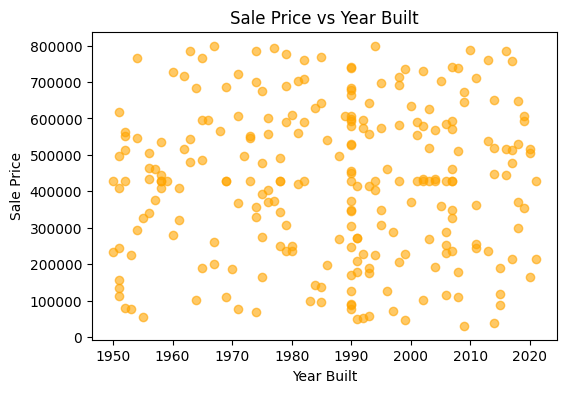

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df['year_built'], df['sale_price'], color='orange', alpha=0.6)
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

/tmp/ipython-input-3454341187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_bedrooms'] = pd.to_numeric(df['num_bedrooms'], errors='coerce')
/tmp/ipython-input-3454341187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')


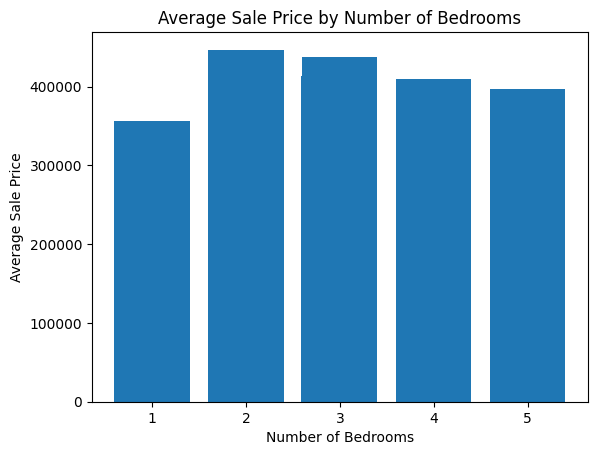

In [ ]:
df['num_bedrooms'] = pd.to_numeric(df['num_bedrooms'], errors='coerce')
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')

bedroom_avg = df.groupby('num_bedrooms')['sale_price'].mean()

plt.bar(bedroom_avg.index, bedroom_avg.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Number of Bedrooms')
plt.show()

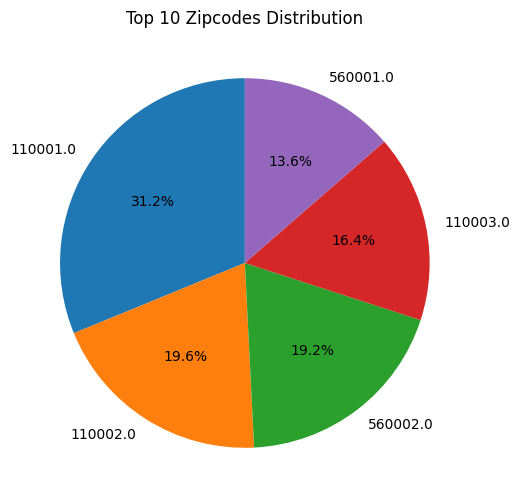

In [ ]:
zipcode_counts = df['zipcode'].value_counts().head(10)
plt.figure(figsize=(6,6))
plt.pie(
    zipcode_counts,
    labels=zipcode_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Top 10 Zipcodes Distribution')
plt.show()


/tmp/ipython-input-4015518141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


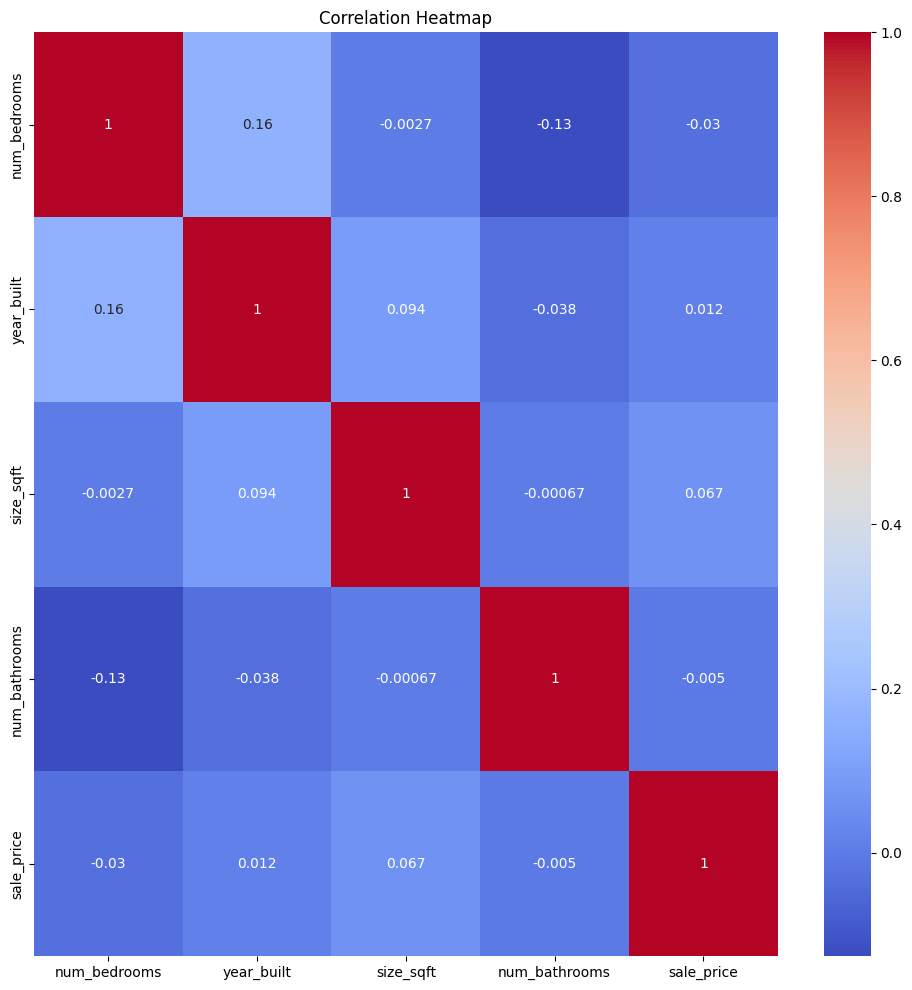

In [ ]:
cols = ['num_bedrooms','year_built','size_sqft','num_bathrooms','sale_price']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
corr = df[cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**1. Data Loading & Initial Inspection**
Loaded the housing_prices_regression.csv dataset using Pandas. Inspected column types and summary statistics.

Detected and removed duplicate rows to ensure unique observations for analysis.

**2. Data Cleaning & Preparation**
Handled Missing Values:

Numeric columns (num_bedrooms, year_built, size_sqft, num_bathrooms, sale_price): Converted to numeric type. Filled missing values using suitable statistics:

Mean for continuous data (e.g., size, price, bedrooms).

Median for columns with potential outliers (e.g., year built).

Categorical columns (zipcode, zipcode_dup, has_garage, has_garden): Filled missing values with the mode (most frequent value).

id column: Standardized by replacing 'unknown' values with NA and filled with new unique IDs for missing entries.

Standardized Binary Columns:

Unified representations for binary columns (has_garage, has_garden):

Converted all case variants and abbreviations ('Yes', 'yes', 'ye', 'ys', etc.) to "yes"

All forms of "no" to "no"

Checked for Remaining Missing Values: Confirmed that missing values were filled, ensuring a complete dataset before analysis.

**3. Data Exploration & Visualization**
Unique Value Analysis:

Reviewed unique values for all columns for data consistency and anomaly detection.

Visualizations Produced:

Bar Plot: Displayed average sale price grouped by number of bedrooms (num_bedrooms). Revealed how property size by bedroom count influences price.

Scatter Plot:

Examined sale price against year built to analyze temporal trends in home value.

Pie Chart:

Illustrated the frequency distribution of the top 10 zipcodes, highlighting location-based grouping in the dataset.

Correlation Heatmap:

Presented the pairwise correlations between major numeric variables (num_bedrooms, year_built, size_sqft, num_bathrooms, sale_price). This informed feature selection and model design by showing which variables are most closely linked.

**4. Key Insights**
Price Variation by Bedrooms:

Bar plot indicated that homes with more bedrooms generally command higher prices, but with non-linear jumps that could be attributed to other features or market factors.

Year Built vs. Pricing:

Scatter plot showed both older and newer homes with high sale prices, suggesting year built alone isn't a simple predictor of price.

Zipcode Concentrations:

Pie chart identified specific zipcodes dominating the listings, which may suggest areas of higher market activity or data collection bias.

Feature Relationships:

The heatmap revealed that size (size_sqft) and number of bedrooms are highly correlated with sale price—key predictors for regression models.

**5. Data Analysis Process Steps**
Read the dataset and preview info.

Drop duplicates.

Identify and fill missing values using appropriate methods.

Standardize categorical and binary columns.

Check and document unique values and data distribution.

Visualize important features via bar plots, scatterplots, pie charts, and heatmaps for exploratory data analysis.

**6. Recommendations for Further Modeling**
Feature engineering: Consider creating additional features (e.g., age of property, price per sqft).

Outlier detection: Investigate unusually high or low sale prices for anomaly analysis.

Geographical analysis: Further geographic mapping for zipcodes could reveal market clusters.

Regression modeling: Use size, bedrooms, and location as major predictors for price modeling.

Categorical encoding: For non-numeric fields, properly encode for ML algorithms.